# Project Twitter Data Analysis

In [68]:
# Importing the required libraries:
import pandas as pd
import numpy as np
import requests
import os
import re
import time
import tweepy
import json
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Gathering -> 1. Twitter_Archive 

In [69]:
# Importing the twitter-archive.csv file into a DataFrame.
# This file is provided by Udacity and it is located in our project folder.
twt_archrive = pd.read_csv(r'D:/Udacity/Data Wrangling/twitter-archive-enhanced.csv',sep=",")
twt_archrive.head(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


# Data Gathering -> 2. Image Predictions

In [70]:
# Make directory if it doesn't already exist
folder_name = 'Data Wrangling'
folder_directory = r'D:/Udacity/'
if not os.path.exists(folder_directory+folder_name):
    os.makedirs(folder_directory+folder_name)

twitter_Url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(twitter_Url)
with open(os.path.join(folder_directory+folder_name,twitter_Url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)
    
# Importing the predictions into a DataFrame
image_predictions = pd.read_csv(r'D:/Udacity/Data Wrangling/image-predictions.tsv' ,sep="\t" )
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Data Gathering -> 3. Tweets FROM Twitter API

In [13]:
consumer_key = '....'
consumer_secret = '....'
access_token = '....'
access_secret = '....'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

available_listof_tweets=[]
unavailable_listof_tweets=[]

for tweet_id in twt_archrive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id)
        available_listof_tweets.append(tweet)
        #print(available_listof_tweets)
    except Exception as e:
        unavailable_listof_tweets.append(tweet_id)
        

        
#Creating dictionary for appending the list tweets into a dictionary so that they can be written into a json file
dict_tweetsAvail=[]
for json_tweets in available_listof_tweets:
    dict_tweetsAvail.append(json_tweets._json)
    #print(dict_tweetsAvail)

with open(r'D:/Udacity/Data Wrangling/twt_json.txt', 'w') as file:
        file.write(json.dumps(dict_tweetsAvail, indent=4))


In [71]:
#Reading the json data from the downloaded file to a dataset
tweet_list=[]
with open(r'D:/Udacity/Data Wrangling/twt_json.txt', encoding='utf-8') as json_tweets: 
    total_tweets = json.load(json_tweets)
    for tweets in total_tweets:
        tweet_id = tweets['id']
        tweet_text = tweets['text']
        url = tweet_text[tweet_text.find('https'):]
        favorite_count = tweets['favorite_count']
        retweet_count = tweets['retweet_count'] 
        created_at = tweets['created_at']
        tweet_source = tweets['source']
        
        tweet_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,
                             'created_at': created_at,
                             'tweet_source': tweet_source
                            })
final_tweets_json = pd.DataFrame(tweet_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'url', 'created_at',
                                                       'tweet_source'])
final_tweets_json.head(5)

,tweet_id,favorite_count,retweet_count,url,created_at,tweet_source
0,892420643555336193,38993,8652,https://t.co/MgUWQ76dJU,Tue Aug 01 16:23:56 +0000 2017,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1,892177421306343426,33388,6355,https://t.co/aQFSeaCu9L,Tue Aug 01 00:17:27 +0000 2017,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2,891815181378084864,25168,4220,https://t.co/r0YlrsGCgy,Mon Jul 31 00:18:03 +0000 2017,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
3,891689557279858688,42346,8767,https://t.co/tD36da7qLQ,Sun Jul 30 15:58:51 +0000 2017,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
4,891327558926688256,40512,9531,https://t.co/0g0KMIVXZ3,Sat Jul 29 16:00:24 +0000 2017,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"


# Assess- > 1. twitter_archive


1. We will try to find out and write down the quality and tidiness issues.
2. The dataframe contains some long strings, missing values, mismatched data types

In [72]:
#Since the dataframe is too large and we are unable to fit it in one window, 
#hence we need the below command for better visualization
pd.options.display.max_colwidth = 10000
twt_archrive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [73]:
twt_archrive.nsmallest(10, 'rating_numerator')[['tweet_id', 'rating_numerator', 'rating_denominator']]
twt_archrive.nlargest(10, 'rating_denominator')[['tweet_id', 'rating_numerator', 'rating_denominator']]
twt_archrive.nsmallest(10, 'rating_denominator')[['tweet_id', 'rating_numerator', 'rating_denominator']]
twt_archrive.nlargest(10, 'rating_denominator')[['tweet_id', 'rating_numerator', 'rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
1120,731156023742988288,204,170
902,758467244762497024,165,150
1634,684225744407494656,143,130
1779,677716515794329600,144,120
1635,684222868335505415,121,110
1228,713900603437621249,99,90
1254,710658690886586372,80,80
1843,675853064436391936,88,80
433,820690176645140481,84,70
1202,716439118184652801,50,50


# Conclusion- Twitter Archive

In [74]:
# Data Quality issues:-
#1. We need to identify the tweets with original tweet id.
#2. We need to identify the tweets with image predictions in it and isolate them.
#3. We can drop most of the columns related to tweet_replies sice most of their value is NAN and we are not planning to use them in analysis
#4. Need to convert the tweet_id column to string.
#5. The ratings numerator and denomenator values seems quite out of the box. The text column has ratings in them. But some of them has double ratings. So we need to identify them and clean them.


# Data Tidyness issues:-
#6. At the end of each tweet, the url of the tweet is present and should be cleaned.
#7. The timestamp column should be split into two columns: date and time. 
#8. For getting source of twitter, we need to remove the https portion and get the actual source.
#9. The four columns i.e. are merged into one single column based on condition on dog breed/size.

# Assess- > 2. image_predictions

In [75]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Conclusion- Image Predictions

In [76]:
# Data Quality issues:-
#1. Need to convert the tweet_id column to string.
#2. The columns in the dataset needs to renamed. The current names does not make any proper sense.
#3. The dog breed names columns should be consistent and should be capitalised.

# Assess- > 3. final_tweets_json

In [77]:
final_tweets_json.head(5)

,tweet_id,favorite_count,retweet_count,url,created_at,tweet_source
0,892420643555336193,38993,8652,https://t.co/MgUWQ76dJU,Tue Aug 01 16:23:56 +0000 2017,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1,892177421306343426,33388,6355,https://t.co/aQFSeaCu9L,Tue Aug 01 00:17:27 +0000 2017,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2,891815181378084864,25168,4220,https://t.co/r0YlrsGCgy,Mon Jul 31 00:18:03 +0000 2017,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
3,891689557279858688,42346,8767,https://t.co/tD36da7qLQ,Sun Jul 30 15:58:51 +0000 2017,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
4,891327558926688256,40512,9531,https://t.co/0g0KMIVXZ3,Sat Jul 29 16:00:24 +0000 2017,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"


# Data Cleaning -> 1.Twitter Archive

In [90]:
twt_archrive_clean = twt_archrive.copy()
image_predictions_clean = image_predictions.copy()
final_tweets_json_clean = final_tweets_json.copy() 

In [91]:
#1. Code to isolate retweet statusid from the main twitter data frame, so that we can use it to drop the retweets column
# It is done because we are only dealing with original tweets and not retweets.

twt_archrive_retw = twt_archrive[twt_archrive['retweeted_status_id'].notnull()]['tweet_id'].tolist()
twt_archrive_clean = twt_archrive_clean[~twt_archrive_clean.tweet_id.isin(twt_archrive_retw)] #Dropping the retweets column

twt_archrive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [92]:
#2. Finding out the tweet id's which has image ids in them and fomatting our cleaned data frame to hold those specific tweets in them:

# Gathering image prediction ids 
image_pred_ids = image_predictions_clean['tweet_id'].tolist()

# Gathering original tweet ids
twt_archive_clean_ids = twt_archrive_clean['tweet_id'].tolist()

# Checking datatypes of newly created lists:
print(type(image_pred_ids[0]))
print(type(twt_archive_clean_ids[0]))

# Finding out those original tweets that have image predictions in them and Saving the list of those tweets:
twt_image_prediction_ids = list(set(image_pred_ids).intersection(twt_archive_clean_ids))

#Saving the original tweets with image predictions in them:
twt_archrive_clean =twt_archrive_clean[twt_archrive_clean.tweet_id.isin(twt_image_prediction_ids)]

<class 'int'>
<class 'int'>


In [93]:
#3. Dropping most of the columns related to tweet_replies sice most of their value is NAN and we are not planning to use them in analysis
twt_archrive_clean = twt_archrive_clean.drop(['retweeted_status_id', 
                                              'retweeted_status_user_id', 
                                              'retweeted_status_timestamp', 
                                              'in_reply_to_status_id', 
                                              'in_reply_to_user_id'],
                                                   axis=1)

twt_archrive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
dtypes: int64(3), object(9)
memory usage: 202.5+ KB


In [94]:
#4. Converting the tweet_id column to string.
twt_archrive_clean['tweet_id'] = twt_archrive_clean['tweet_id'].astype('str')

In [95]:
#5. We need to save all the ratings from the 'text' column to a separate column and add it to the dataframe for analysis.
# We also need to identify those records having more than 1 ratings in the text as these might be confusing.

ratings_list = []
for tweet in twt_archrive_clean.index.tolist():
    twt_ratings = re.findall(r'((?:\d+\.)?\d+)\/(\d+)', twt_archrive_clean.loc[tweet, 'text'])
    ratings_list.append(twt_ratings)    
    
# Adding the list to our 'twt_archrive_clean' DataFrame
twt_archrive_clean['rating'] = ratings_list
#twt_archrive_clean.to_csv(r'D:/Udacity/Data Wrangling/twt_archrive_preMerge4.csv',index=False)


# Identifying the tweets with more than one rating and adding the details to our data frame: 
indexes_multiple_ratigs = []
for index in twt_archrive_clean.index.tolist():
    if len(twt_archrive_clean.loc[index, 'rating']) > 1:
        indexes_multiple_ratigs.append(index)
        
# Printing these tweets:
twt_archrive_clean.loc[indexes_multiple_ratigs, ['text', 'rating_numerator', 'rating_denominator','url', 'rating']]

# Inerence:
# We can see there are total 27 rows for double ratings. These cases are mostly related 
# to the image tweets where there are more than one dogs present. So we can drop these tweets easily.


# Dropping double rating tweeets:
twt_archrive_clean = twt_archrive_clean[~twt_archrive_clean.index.isin(indexes_multiple_ratigs)]

# For tweets in decimal number, we need to consider the total value. The data cleaning for that is as follows:
twt_archrive_clean['rating'] = twt_archrive_clean['rating'].astype('str')
twt_archrive_clean.info()

Numerator_ratings = []
for index in twt_archrive_clean['rating']:
    nume_rate = index.split("'")[1]
    Numerator_ratings.append(nume_rate)
    
twt_archrive_clean['rating_numerator'] = Numerator_ratings

# After cleaning of data is completed related to double ratings, we are now dropping the 'Ratings' column
twt_archrive_clean = twt_archrive_clean.drop('rating', axis=1)
twt_archrive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null object
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
doggo                 1967 non-null object
floofer               1967 non-null object
pupper                1967 non-null object
puppo                 1967 non-null object
rating                1967 non-null object
dtypes: int64(2), object(11)
memory usage: 215.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null object
source                1967 non-null object
text                  1967 non-null object
expa

C:\Users\GAYERIKE\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


In [96]:
#6. Separating the url's from each tweets and cleaning them. For this job we are using a function
def text_separated(dataframe, columnname, keyword):
    twt_txts = []
    for twts in dataframe[columnname]: #Gathering all the mixed data from text column in the data frame and storing them in list
        twt_txts.append(twts)
    twts_cleaned = []
    for twts_2 in twt_txts:
        cleaned_twt = twts_2[:twts_2.find(keyword)-1] #Substring function that will store the text before 'https://'
        twts_cleaned.append(cleaned_twt)
    return(twts_cleaned)

# Creating a new column by calling the function
twt_archrive_clean['new_text'] = text_separated(twt_archrive_clean, 'text', 'https')

twt_archrive_clean['text'] =twt_archrive_clean['new_text']
twt_archrive_clean = twt_archrive_clean.drop('new_text', axis=1)
twt_archrive_clean = twt_archrive_clean.drop('expanded_urls', axis=1)
twt_archrive_clean.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12,10,Franklin,None,None,None,None


In [97]:
#7. The timestamp column needs to be cleaned. Extract the date, time from the column and store them into separate variables
twt_archrive.info()

#We can observe that the timestamp column is of datatype '2356 non-null object'. Hence we need to convert it into DataTime datatype
#for further analysis.
twt_archrive_clean['timestamp'] = pd.DatetimeIndex(twt_archrive_clean['timestamp']) 
twt_archrive_clean.info()

# Isolating only the timestamp column
time_Stamp = pd.DatetimeIndex(twt_archrive_clean['timestamp'])

# Extracting the Date, Year, Month, Day of the Week and Time of the tweet
twt_archrive_clean['Date'] = time_Stamp.date
twt_archrive_clean['Year'] = time_Stamp.year
twt_archrive_clean['Month'] = time_Stamp.month
twt_archrive_clean['Day_of_Week'] = time_Stamp.dayofweek
twt_archrive_clean['Time'] = time_Stamp.time

# Code to replace 'Months' in Integer to string Names. Retaining Month in digit format will result in bad visualization 
# and confusing Data Analysis. Hence we need to replace the digits with the names of the respective months.
twt_archrive_clean['Month'].replace(1, 'January', inplace=True)
twt_archrive_clean['Month'].replace(2, 'February', inplace=True)
twt_archrive_clean['Month'].replace(3, 'March', inplace=True)
twt_archrive_clean['Month'].replace(4, 'April', inplace=True)
twt_archrive_clean['Month'].replace(5, 'May', inplace=True)
twt_archrive_clean['Month'].replace(6, 'June', inplace=True)
twt_archrive_clean['Month'].replace(7, 'July', inplace=True)
twt_archrive_clean['Month'].replace(8, 'August', inplace=True)
twt_archrive_clean['Month'].replace(9, 'September', inplace=True)
twt_archrive_clean['Month'].replace(10, 'October', inplace=True)
twt_archrive_clean['Month'].replace(11, 'November', inplace=True)
twt_archrive_clean['Month'].replace(12, 'December', inplace=True)


# A similar approach like the 'Months' is also followed in case of days.
twt_archrive_clean['Day_of_Week'].replace(0, 'Monday', inplace=True)
twt_archrive_clean['Day_of_Week'].replace(1, 'Tuesday', inplace=True)
twt_archrive_clean['Day_of_Week'].replace(2, 'Wednesday', inplace=True)
twt_archrive_clean['Day_of_Week'].replace(3, 'Thursday', inplace=True)
twt_archrive_clean['Day_of_Week'].replace(4, 'Friday', inplace=True)
twt_archrive_clean['Day_of_Week'].replace(5, 'Saturday', inplace=True)
twt_archrive_clean['Day_of_Week'].replace(6, 'Sunday', inplace=True)


# After extracting and separating all the values from the timestamp column, we need to drop the 'Timestamp' column
# as it is a redundant column.
twt_archrive_clean = twt_archrive_clean.drop('timestamp', axis=1)
twt_archrive_clean.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Date,Year,Month,Day_of_Week,Time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,None,None,None,None,2017-08-01,2017,August,Tuesday,16:23:56
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,None,None,None,None,2017-08-01,2017,August,Tuesday,00:17:27
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,None,None,None,None,2017-07-31,2017,July,Monday,00:18:03
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla,None,None,None,None,2017-07-30,2017,July,Sunday,15:58:51
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12,10,Franklin,None,None,None,None,2017-07-29,2017,July,Saturday,16:00:24


In [98]:
#8. Getting the tweet source and removing the html anchor from it
twt_archrive_clean['source'].value_counts()
twt_archrive_clean['new_source'] = twt_archrive_clean['source']

for source in twt_archrive_clean['source']:
    if 'Twitter for iPhone' in source:
        twt_archrive_clean['new_source']=twt_archrive_clean['new_source'].replace({source: 'Twitter for iPhone'}, regex=True)
    if 'Twitter Web Client' in source:
        twt_archrive_clean['new_source']=twt_archrive_clean['new_source'].replace({source: 'Twitter Web Client'}, regex=True)
    if 'Vine - Make a Scene' in source:
        twt_archrive_clean['new_source']=twt_archrive_clean['new_source'].replace({source: 'Vine - Make a Scene'}, regex=True)
    if 'TweetDeck' in source:
        twt_archrive_clean['new_source']=twt_archrive_clean['new_source'].replace({source: 'TweetDeck'}, regex=True)


twt_archrive_clean['source'] = twt_archrive_clean['new_source']

# After cleaning of data is completed related to double ratings, we are now dropping the Ratings column
twt_archrive_clean = twt_archrive_clean.drop('new_source', axis=1)

twt_archrive_clean.head(5)

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Date,Year,Month,Day_of_Week,Time
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,None,None,None,None,2017-08-01,2017,August,Tuesday,16:23:56
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,None,None,None,None,2017-08-01,2017,August,Tuesday,00:17:27
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,None,None,None,None,2017-07-31,2017,July,Monday,00:18:03
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla,None,None,None,None,2017-07-30,2017,July,Sunday,15:58:51
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12,10,Franklin,None,None,None,None,2017-07-29,2017,July,Saturday,16:00:24


In [99]:
#8. The four columns i.e. are merged into one single column based on condition on dog breed/size and all the four columns are dropped.
twt_archrive_clean['doggo'].replace('None', '', inplace=True)
twt_archrive_clean['floofer'].replace('None', '', inplace=True)
twt_archrive_clean['pupper'].replace('None', '', inplace=True)
twt_archrive_clean['puppo'].replace('None', '', inplace=True)

twt_archrive_clean['breedSize'] = (twt_archrive_clean['doggo'] + 
                                   twt_archrive_clean['floofer'] + 
                                   twt_archrive_clean['pupper'] + 
                                   twt_archrive_clean['puppo'])

twt_archrive_clean['breedSize'].replace('', 'NA', inplace=True)
twt_archrive_clean['breedSize'].value_counts()

twt_archrive_clean = twt_archrive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

twt_archrive_clean.head(5)

,tweet_id,source,text,rating_numerator,rating_denominator,name,Date,Year,Month,Day_of_Week,Time,breedSize
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,2017-08-01,2017,August,Tuesday,16:23:56,NA
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,2017-08-01,2017,August,Tuesday,00:17:27,NA
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,2017-07-31,2017,July,Monday,00:18:03,NA
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla,2017-07-30,2017,July,Sunday,15:58:51,NA
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12,10,Franklin,2017-07-29,2017,July,Saturday,16:00:24,NA


# Data Cleaning -> 2. Image Predictions

In [100]:
# 1. Converting the tweet id to datatype string
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype('str')
image_predictions_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [101]:
#2. The column names are not recognisable. Hence we need to rename the columns.
image_predictions_clean = image_predictions_clean.rename(columns={'jpg_url': 'image_url',
                                                                  'img_num': 'image_number',
                                                                  'p1': 'first_breed_prediction',                                                                  
                                                                  'p2': 'second_breed_prediction',                                                                  
                                                                  'p3': 'third_breed_prediction',                                                                 
                                                                 })

# Dropping those columns which are of no use to us.
image_predictions_clean  = image_predictions_clean.drop('p1_conf', axis=1)
image_predictions_clean  = image_predictions_clean.drop('p2_conf', axis=1)
image_predictions_clean  = image_predictions_clean.drop('p3_conf', axis=1)
image_predictions_clean  = image_predictions_clean.drop('p1_dog', axis=1)
image_predictions_clean  = image_predictions_clean.drop('p2_dog', axis=1)
image_predictions_clean  = image_predictions_clean.drop('p3_dog', axis=1)

image_predictions_clean.head(5)

,tweet_id,image_url,image_number,first_breed_prediction,second_breed_prediction,third_breed_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,malinois,bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,redbone,miniature_pinscher
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,Rottweiler,Doberman


In [102]:
#3. Code to make all the dog breed names in consistent camel case throught the dataset.
image_predictions_clean['first_breed_prediction'] = image_predictions_clean['first_breed_prediction'].str.title()
image_predictions_clean['second_breed_prediction'] = image_predictions_clean['second_breed_prediction'].str.title()
image_predictions_clean['third_breed_prediction'] = image_predictions_clean['third_breed_prediction'].str.title()

image_predictions_clean.head(5)

,tweet_id,image_url,image_number,first_breed_prediction,second_breed_prediction,third_breed_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,Collie,Shetland_Sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,Miniature_Pinscher,Rhodesian_Ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,Malinois,Bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,Redbone,Miniature_Pinscher
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,Rottweiler,Doberman


# Data Merging

In [103]:
# Now we need to merge all the cleaned data from the three datasets- twt_archrive_clean, image_predictions_clean, final_tweets_json 
# into one single dataset. This master dataset is to be used for further Data Analysis.

twt_archrive_preMerge = twt_archrive_clean


twt_archrive_clean = pd.merge(twt_archrive_clean, final_tweets_json_clean.loc[:, ['tweet_id','retweet_count','favorite_count','url',]], 
                                  on='tweet_id', how='left')

twt_archrive_clean = pd.merge(twt_archrive_clean, image_predictions_clean.loc[:, ['tweet_id','image_url','image_number', 
                                                  'first_breed_prediction','second_breed_prediction', 'third_breed_prediction']], 
                                                   on='tweet_id', how='left')

twt_archrive_clean.head(5)

,tweet_id,source,text,rating_numerator,rating_denominator,name,Date,Year,Month,Day_of_Week,Time,breedSize,retweet_count,favorite_count,url,image_url,image_number,first_breed_prediction,second_breed_prediction,third_breed_prediction
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,2017-08-01,2017,August,Tuesday,16:23:56,NA,8652.0,38993.0,https://t.co/MgUWQ76dJU,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,Bagel,Banana
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,2017-08-01,2017,August,Tuesday,00:17:27,NA,6355.0,33388.0,https://t.co/aQFSeaCu9L,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,Pekinese,Papillon
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,2017-07-31,2017,July,Monday,00:18:03,NA,4220.0,25168.0,https://t.co/r0YlrsGCgy,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,Malamute,Kelpie
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla,2017-07-30,2017,July,Sunday,15:58:51,NA,8767.0,42346.0,https://t.co/tD36da7qLQ,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_Towel,Labrador_Retriever,Spatula
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12,10,Franklin,2017-07-29,2017,July,Saturday,16:00:24,NA,9531.0,40512.0,https://t.co/0g0KMIVXZ3,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,English_Springer,German_Short-Haired_Pointer


# Data Storing

In [104]:
# Final Copy
twt_archrive_clean.to_csv(r'D:/Udacity/Data Wrangling/twitter_archive_master.csv',index=False)

# Three separate datasets:
twt_archrive_preMerge.to_csv(r'D:/Udacity/Data Wrangling/twt_archrive_preMerge.csv',index=False)
final_tweets_json_clean.to_csv(r'D:/Udacity/Data Wrangling/final_tweets_json_clean.csv',index=False)
image_predictions_clean.to_csv(r'D:/Udacity/Data Wrangling/image_predictions_clean.csv',index=False)

In [105]:
twt_archrive_clean.head(5)

,tweet_id,source,text,rating_numerator,rating_denominator,name,Date,Year,Month,Day_of_Week,Time,breedSize,retweet_count,favorite_count,url,image_url,image_number,first_breed_prediction,second_breed_prediction,third_breed_prediction
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,2017-08-01,2017,August,Tuesday,16:23:56,NA,8652.0,38993.0,https://t.co/MgUWQ76dJU,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,Bagel,Banana
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,2017-08-01,2017,August,Tuesday,00:17:27,NA,6355.0,33388.0,https://t.co/aQFSeaCu9L,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,Pekinese,Papillon
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,2017-07-31,2017,July,Monday,00:18:03,NA,4220.0,25168.0,https://t.co/r0YlrsGCgy,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,Malamute,Kelpie
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla,2017-07-30,2017,July,Sunday,15:58:51,NA,8767.0,42346.0,https://t.co/tD36da7qLQ,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_Towel,Labrador_Retriever,Spatula
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12,10,Franklin,2017-07-29,2017,July,Saturday,16:00:24,NA,9531.0,40512.0,https://t.co/0g0KMIVXZ3,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,English_Springer,German_Short-Haired_Pointer


# Data Visualization and Analysis

In [106]:
twt_archrive_clean.describe()

,rating_denominator,Year,retweet_count,favorite_count,image_number
count,1967.000000,1967.000000,1300.000000,1300.000000,1967.000000
mean,10.517031,2015.851551,2832.227692,9820.846154,1.203355
std,7.310967,0.699750,4826.424697,14273.106846,0.561868
min,7.000000,2015.000000,13.000000,80.000000,1.000000
25%,10.000000,2015.000000,459.750000,1231.500000,1.000000
50%,10.000000,2016.000000,1185.500000,3169.000000,1.000000
75%,10.000000,2016.000000,3482.500000,14040.750000,1.000000
max,170.000000,2017.000000,61543.000000,144042.000000,4.000000


###### The mean dog rating for the dataset is 10.51.
###### The mean retweet count is: 2832.
###### The mean favorite count is: 9820.
###### 144,042 was the maxumum tweet favorite count.
###### 61,543 was the maxumum tweet retweet count.

### Most common ratings

In [107]:
twt_archrive_clean['rating_numerator'].value_counts()

12       449
10       408
11       393
13       261
9        149
8         93
7         50
14        35
6         32
5         30
3         19
4         14
2          9
1          4
0          2
9.75       1
80         1
88         1
84         1
420        1
99         1
143        1
204        1
44         1
121        1
11.26      1
24         1
13.5       1
165        1
1776       1
60         1
11.27      1
45         1
144        1
Name: rating_numerator, dtype: int64

Text(0.5,0,'Dog Rating')

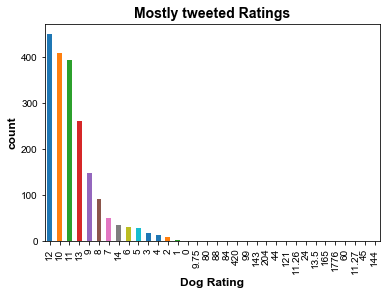

In [108]:
fig, snsplot = plt.subplots()
sns.set_style("white")
twt_archrive_clean['rating_numerator'].value_counts(sort=True).plot(kind='bar')
snsplot.set_title('Mostly tweeted Ratings', fontsize=14, fontweight="bold")
snsplot.set_ylabel('count', fontsize=12,fontweight="bold")
snsplot.set_xlabel('Dog Rating', fontsize=12,fontweight="bold")

###### The most common dog ratings were 12, 10, 11  

### Tweet that was mostly retweeted in the dataset.

In [109]:
twt_archrive_clean[twt_archrive_clean['retweet_count'] == max(twt_archrive_clean['retweet_count'])]

,tweet_id,source,text,rating_numerator,rating_denominator,name,Date,Year,Month,Day_of_Week,Time,breedSize,retweet_count,favorite_count,url,image_url,image_number,first_breed_prediction,second_breed_prediction,third_breed_prediction
400,807106840509214720,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy,13,10,Stephan,2016-12-09,2016,December,Friday,06:17:20,NA,61543.0,123463.0,https://t.co/DkBYaCAg2d,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,Pomeranian,Toy_Terrier


###### This tweet was retweeted 61,543 times. The tweet text says "This is Stephan. He just wants to help."

### Tweet that was mostly favorited in the dataset?

In [110]:
twt_archrive_clean[twt_archrive_clean['favorite_count'] == max(twt_archrive_clean['favorite_count'])]

,tweet_id,source,text,rating_numerator,rating_denominator,name,Date,Year,Month,Day_of_Week,Time,breedSize,retweet_count,favorite_count,url,image_url,image_number,first_breed_prediction,second_breed_prediction,third_breed_prediction
309,822872901745569793,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10,13,10,None,2017-01-21,2017,January,Saturday,18:26:02,puppo,49484.0,144042.0,https://t.co/nTz3FtorBc,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_Terrier,Labrador_Retriever,Irish_Terrier


###### This tweet was favorited 144042 times. The tweet text says "Here's a super supportive puppo participating in the Toronto #WomensMarch today."

### Number of tweets tweeted per month

In [111]:
twt_archrive_clean.groupby(['Month', 'Year'], sort=False).count().iloc[::-1, 0]

Month      Year
November   2015    288
December   2015    361
January    2016    165
February   2016    108
March      2016    119
April      2016     52
May        2016     57
June       2016     79
July       2016     88
August     2016     59
September  2016     62
October    2016     65
November   2016     53
December   2016     54
January    2017     66
February   2017     64
March      2017     48
April      2017     41
May        2017     43
June       2017     44
July       2017     49
August     2017      2
Name: tweet_id, dtype: int64

Text(0.5,0,'Months from 2015')

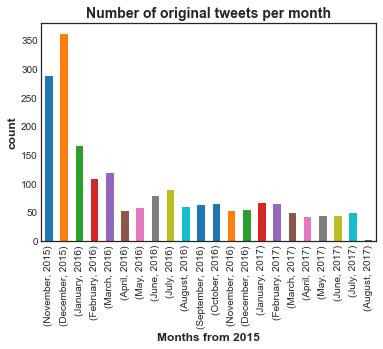

In [112]:
fig, snsplot = plt.subplots()
sns.set_style("white")
twt_archrive_clean.groupby(['Month', 'Year'], sort=False).count().iloc[::-1, 0].plot(kind='bar')
snsplot.set_title('Number of original tweets per month', fontsize=14, fontweight="bold")
snsplot.set_ylabel('count', fontsize=12, fontweight="bold")
snsplot.set_xlabel('Months from 2015', fontsize=12, fontweight="bold")

###### The highest number of tweets was posted in the month of November and December of 2015. After July 2016, tweet counts were substantially decreased below 100 and averaged between 40 to 60 per month.

### The most used Twitter app through which tweets were posted

In [113]:
twt_archrive_clean['source'].value_counts()

Twitter for iPhone    1930
Twitter Web Client      26
TweetDeck               11
Name: source, dtype: int64

Text(0.5,0,'Twitter Device')

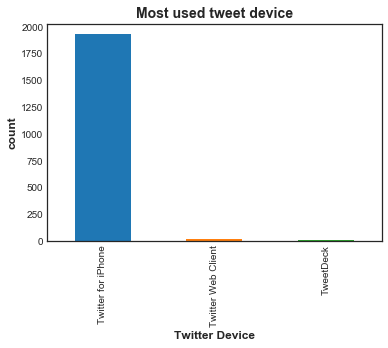

In [114]:
fig, snsplot = plt.subplots()
sns.set_style("white")
twt_archrive_clean['source'].value_counts().plot(kind='bar')
snsplot.set_title('Most used tweet device', fontsize=14, fontweight="bold")
snsplot.set_ylabel('count', fontsize=12, fontweight="bold")
snsplot.set_xlabel('Twitter Device',fontsize=12,fontweight="bold" )

###### From this analysis we can infer that people preferred to use Twitter Iphone app most of the times for their tweeting.

### Top 5 of most commonly tweeted Dog Names

In [115]:
twt_archrive_clean['name'].value_counts()[:15]

None       535
a           55
Charlie     11
Oliver      10
Lucy        10
Cooper      10
Penny        9
Tucker       9
Winston      8
Sadie        8
Lola         7
Daisy        7
the          7
Toby         7
Koda         6
Name: name, dtype: int64

Text(0.5,0,'Dog Names')

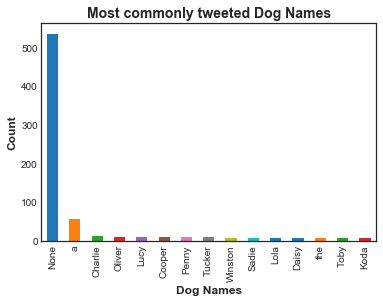

In [116]:
fig, snsplot = plt.subplots()
sns.set_style("white")
twt_archrive_clean['name'].value_counts()[:15].plot(kind='bar')
snsplot.set_title('Most commonly tweeted Dog Names', fontsize=14, fontweight="bold")
snsplot.set_ylabel('Count', fontsize=12, fontweight="bold")
snsplot.set_xlabel('Dog Names', fontsize=12, fontweight="bold")


###### The most common dog names were Charlie, Cooper, Oliver etc.